✅ Best threshold: 0.1645
   Precision: 0.0952
   Recall:    0.1400
   F1 Score:  0.1134


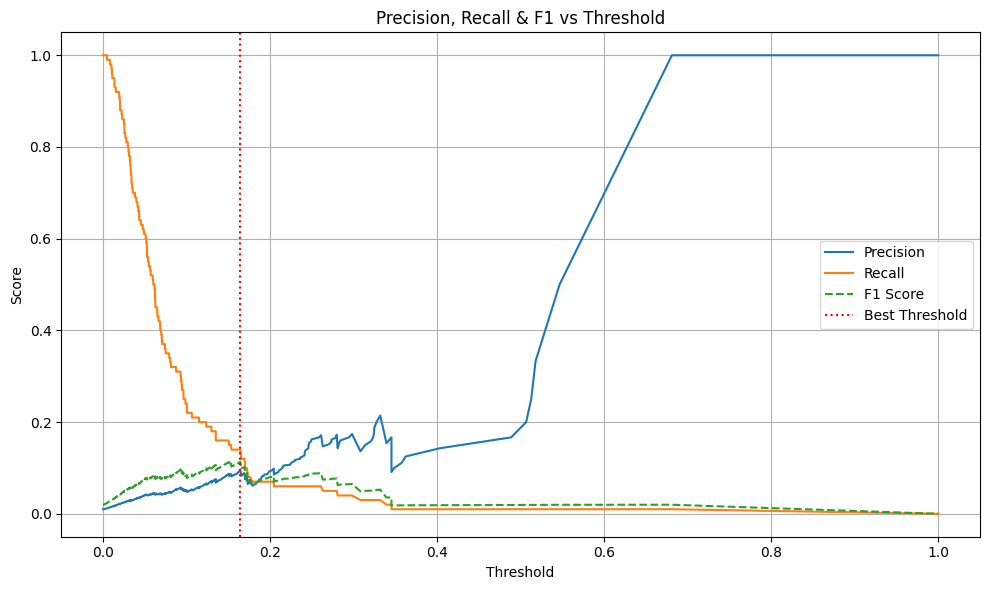

In [75]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)

# Step 2: Compute F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# Step 3: Find best threshold (where F1 is highest)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

print(f"✅ Best threshold: {best_threshold:.4f}")
print(f"   Precision: {best_precision:.4f}")
print(f"   Recall:    {best_recall:.4f}")
print(f"   F1 Score:  {best_f1:.4f}")

# Optional Step 4: Plot the metrics
thresholds = np.append(thresholds, 1.0)  # add endpoint for plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score', linestyle='--')
plt.axvline(x=best_threshold, color='r', linestyle=':', label='Best Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall & F1 vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
✅ Accuracy:  0.9780
✅ Precision: 0.0890
✅ Recall:    0.1300
✅ F1 Score:  0.1057
✅ AUC:       0.8275


/var/folders/2k/p5z1x36d3ln06tw38tydhzv40000gn/T/ipykernel_4855/2928903621.py:47: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


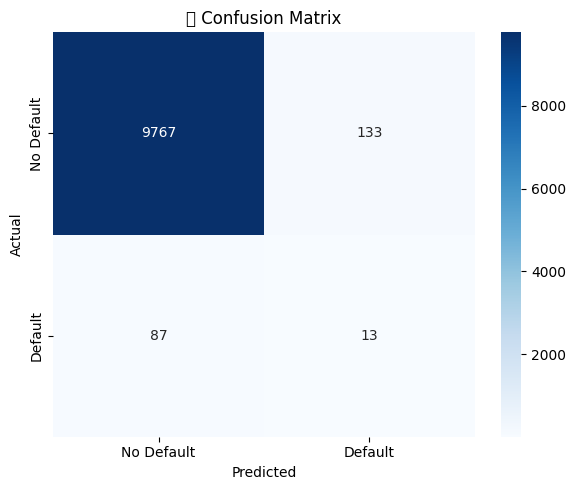

/var/folders/2k/p5z1x36d3ln06tw38tydhzv40000gn/T/ipykernel_4855/2928903621.py:59: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


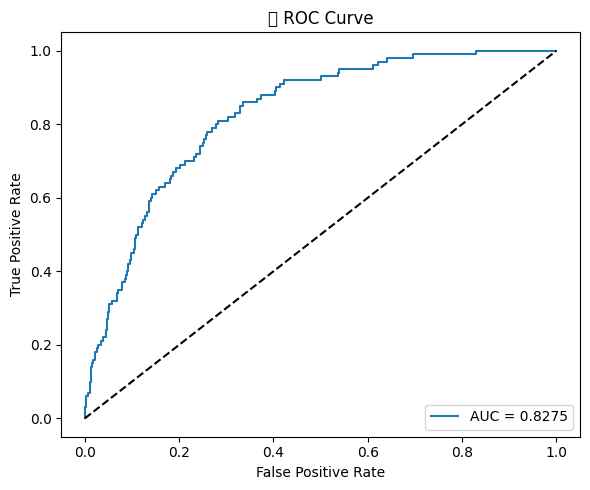

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

# 1. Load the model
model = load_model("../output/model/nn_best_model.keras")

# 2. Load test data
df_test = pd.read_parquet("../data/test_data.parquet")
X_test = df_test.drop(columns=["case_id", "date_decision", "target"])
y_true = df_test["target"]

# 3. Scale features (⚠️ Ideally use original training scaler)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# 4. Predict
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.1645).astype("int")

# 5. Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred_prob)

print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print(f"✅ AUC:       {auc:.4f}")

# 6. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 7. ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.title("📈 ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()